https://github.com/yzhao062/pyod

In [91]:
# train the ECOD detector
from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.knn import KNN   # kNN detector
# from pyod.models.lscp import LSCP
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
clf = ECOD()
clf2 = COPOD()
clf3 = KNN()

plt.rcParams["figure.figsize"] = (25,6)

In [92]:
DATA_ROOT_FOLDER = "NumentaAnomalyBenchmark/"
DATA_FOLDERS = ["artificialNoAnomaly/",
                "artificialWithAnomaly/",
                "realAdExchange/",
                "realAWSCCloudwatch/",
                "realKnownCause/",
                "realTraffic/",
                "realTweets/"]

FOLDER = 2

dataframes_names = []
dataframes = []
for filename in os.listdir(DATA_ROOT_FOLDER + DATA_FOLDERS[FOLDER]):
    if filename.endswith(".csv"):
        dataframes_names.append( filename[:-4])
        dataframes.append(pd.read_csv(DATA_ROOT_FOLDER + DATA_FOLDERS[FOLDER] + filename))
    else:
        continue

## Remove TIMESTAMP since DATA is artificial all timestamps are unidistant

In [93]:
for i in range(len(dataframes)):
    dataframes[i] =dataframes[i].drop(labels=['timestamp'],axis=1)

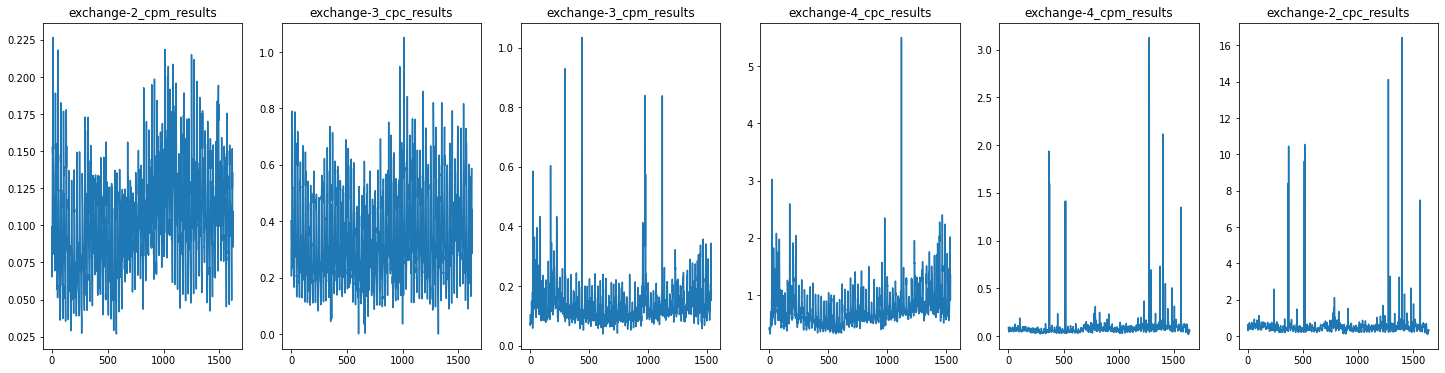

In [94]:
plt.subplots(1,len(dataframes))

for i in range(len(dataframes)):
    plt.title(dataframes_names[i])
    plt.subplot(1,len(dataframes),i+1)
    plt.plot(range(dataframes[i].shape[0]),dataframes[i]["value"])

plt.show()

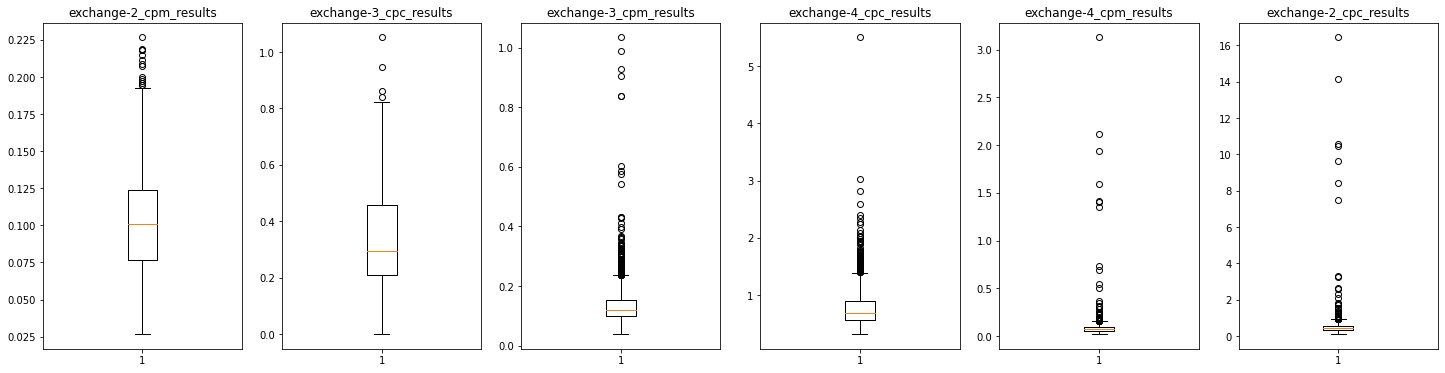

In [95]:
plt.subplots(1,len(dataframes))

for i in range(len(dataframes)):
    plt.title(dataframes_names[i])
    plt.subplot(1,len(dataframes),i+1)
    plt.boxplot(dataframes[i]["value"])

plt.show()


# median = np.median(data)
# upper_quartile = np.percentile(data, 75)
# lower_quartile = np.percentile(data, 25)
#
# iqr = upper_quartile - lower_quartile
# upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
# lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

In [96]:
dataframe_arrays = []
train_sets = []
test_sets = []
for i in range(len(dataframes)):
    dataframe_arrays.append(np.array_split(dataframes[i], 2))
    train_sets.append(dataframe_arrays[i][0])
    test_sets.append(dataframe_arrays[i][1])

In [97]:
y_test_scores = []

for i in range(len(dataframes)):
    clf3.fit(train_sets[i])
    # get outlier scores
    # y_train_scores = clf.decision_scores_  # raw outlier scores on the train data
    y_test_scores.append(clf.decision_function(test_sets[i]) )


In [98]:
for i in range(len(dataframes)):
    test_sets[i]['prediction'] = y_test_scores[i]

In [99]:
test_sets[0]

,value,prediction
812,0.089681,1.431642
813,0.085401,1.624327
814,0.068155,2.556366
815,0.055516,3.608458
816,0.053004,3.926912
...,...,...
1619,0.094662,1.223037
1620,0.097657,1.108513
1621,0.096201,1.142672
1622,0.085386,1.630596


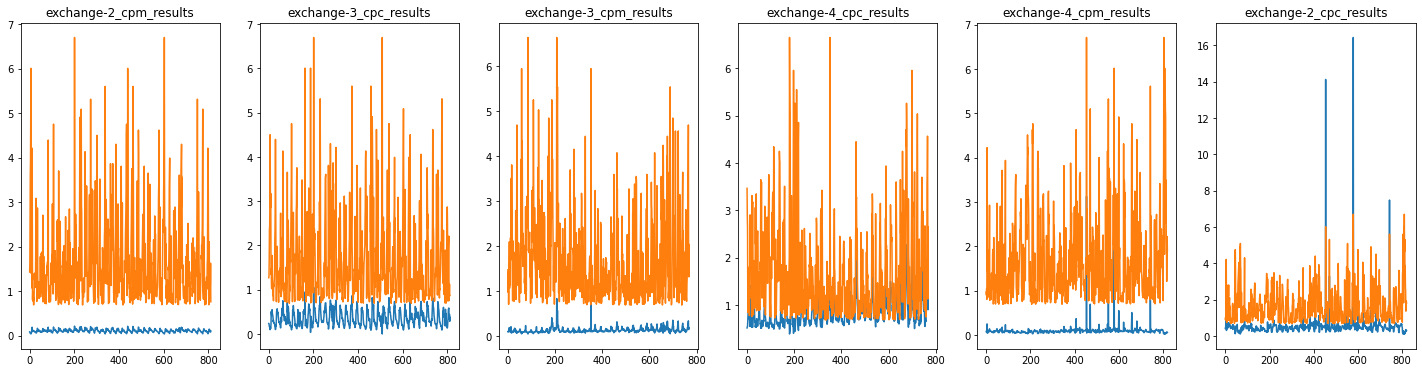

In [100]:
plt.subplots(1,len(dataframes))

for i in range(len(dataframes)):
    plt.title(dataframes_names[i])
    plt.subplot(1,len(dataframes),(i+1))
    plt.plot(range(len(test_sets[i])),test_sets[i]["value"])
    plt.plot(range(len(test_sets[i])),test_sets[i]["prediction"])

plt.show()

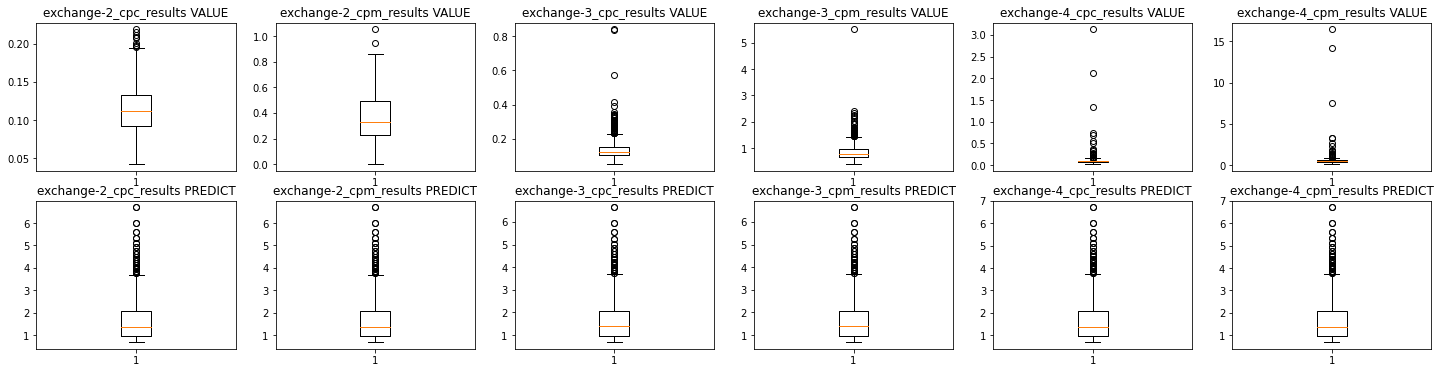

In [101]:
plt.subplots(2,len(dataframes))

for i in range(len(dataframes)):

    plt.subplot(2,len(dataframes),i+1)
    plt.title(dataframes_names[i] + " VALUE")
    plt.boxplot(test_sets[i]["value"])
    plt.subplot(2,len(dataframes),i+1 + 6)
    plt.title(dataframes_names[i]+ " PREDICT")
    plt.boxplot(test_sets[i]["prediction"])


plt.show()
